In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression


In [6]:
df = pd.read_csv("/content/NCRB_Table_1A.1.csv")
print(df.head(5))

  Sl. No.           State/UT    2020    2021    2022  \
0       1     Andhra Pradesh  188997  179611  158547   
1       2  Arunachal Pradesh    2244    2626    2308   
2       3              Assam  111558  119883   59315   
3       4              Bihar  194698  186006  211079   
4       5       Chhattisgarh   65216   70519   73822   

   Mid-Year Projected Population (in Lakhs) (2022)  \
0                                            530.3   
1                                             15.5   
2                                            354.9   
3                                           1255.3   
4                                            299.5   

   Rate of Cognizable Crimes (IPC) (2022)  Chargesheeting Rate (2022)  
0                                   299.0                        86.5  
1                                   148.8                        47.2  
2                                   167.1                        32.6  
3                                   168.1         

In [7]:
print("shape of dataset",(df.shape))

shape of dataset (39, 8)


In [9]:
print("columns:",df.columns)




columns: Index(['Sl. No.', 'State/UT', '2020', '2021', '2022',
       'Mid-Year Projected Population (in Lakhs) (2022)',
       'Rate of Cognizable Crimes (IPC) (2022)', 'Chargesheeting Rate (2022)'],
      dtype='object')


In [92]:
print("dataset description",df.describe())

dataset description                2020          2021          2022
count  3.900000e+01  3.900000e+01  3.900000e+01
mean   3.272582e+05  2.817969e+05  2.739522e+05
std    9.083960e+05  7.682254e+05  7.453848e+05
min    1.070000e+02  8.900000e+01  6.400000e+01
25%    2.727000e+03  2.555000e+03  2.985000e+03
50%    6.521600e+04  7.051900e+04  5.931500e+04
75%    1.939885e+05  2.002790e+05  2.024960e+05
max    4.254356e+06  3.663360e+06  3.561379e+06


In [91]:
print("dataset info:",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   39 non-null     object
 1   2020    39 non-null     int64 
 2   2021    39 non-null     int64 
 3   2022    39 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ KB
dataset info: None


In [13]:
df.drop(columns=['Sl. No.'])

,State/UT,2020,2021,2022,Mid-Year Projected Population (in Lakhs) (2022),Rate of Cognizable Crimes (IPC) (2022),Chargesheeting Rate (2022)
0,Andhra Pradesh,188997,179611,158547,530.3,299.0,86.5
1,Arunachal Pradesh,2244,2626,2308,15.5,148.8,47.2
2,Assam,111558,119883,59315,354.9,167.1,32.6
3,Bihar,194698,186006,211079,1255.3,168.1,75.4
4,Chhattisgarh,65216,70519,73822,299.5,246.5,80.4
5,Goa,3393,2099,2711,15.7,172.8,75.9
6,Gujarat,381849,273056,134600,709.3,189.8,89.8
7,Haryana,103276,112720,125435,299.7,418.6,43.3
8,Himachal Pradesh,14803,13041,13231,74.4,177.8,82.9
9,Jharkhand,51033,47684,48726,391.4,124.5,58.2


In [14]:
df.isnull().sum()

,0
Sl. No.,0
State/UT,0
2020,0
2021,0
2022,0
Mid-Year Projected Population (in Lakhs) (2022),0
Rate of Cognizable Crimes (IPC) (2022),0
Chargesheeting Rate (2022),0


In [20]:
df = df.drop(columns=['Sl. No.'])
df

,State/UT,2020,2021,2022
0,Andhra Pradesh,188997,179611,158547
1,Arunachal Pradesh,2244,2626,2308
2,Assam,111558,119883,59315
3,Bihar,194698,186006,211079
4,Chhattisgarh,65216,70519,73822
5,Goa,3393,2099,2711
6,Gujarat,381849,273056,134600
7,Haryana,103276,112720,125435
8,Himachal Pradesh,14803,13041,13231
9,Jharkhand,51033,47684,48726


In [21]:
df = df.rename(columns={'State/UT':'State'})
df

,State,2020,2021,2022
0,Andhra Pradesh,188997,179611,158547
1,Arunachal Pradesh,2244,2626,2308
2,Assam,111558,119883,59315
3,Bihar,194698,186006,211079
4,Chhattisgarh,65216,70519,73822
5,Goa,3393,2099,2711
6,Gujarat,381849,273056,134600
7,Haryana,103276,112720,125435
8,Himachal Pradesh,14803,13041,13231
9,Jharkhand,51033,47684,48726


In [66]:
crime_state = df['State']
year_2020 = df['2020']




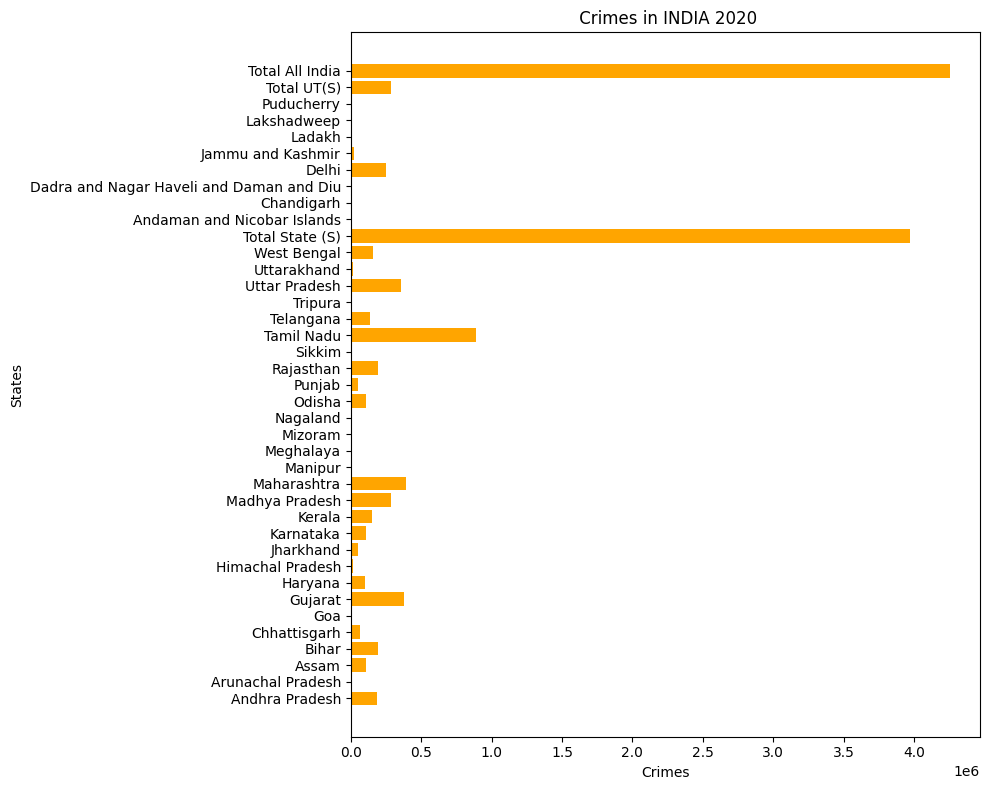

In [112]:
plt.figure(figsize=(10,8))
plt.barh(crime_state,year_2020,color='orange')
plt.xlabel("Crimes")
plt.ylabel("States")
plt.title(" Crimes in INDIA 2020")
plt.tight_layout()
plt.show()

In [22]:
india_total = df[df['State']=="Total All India"]
india_total

,State,2020,2021,2022
38,Total All India,4254356,3663360,3561379


In [23]:
years = india_total.columns[1:]
years

Index(['2020', '2021', '2022'], dtype='object')

In [27]:
crimes = india_total.iloc[0,1:]
crimes

,38
2020,4254356
2021,3663360
2022,3561379


In [88]:
years = ['2020','2021','2022']
crimes = crimes.astype(int)

In [89]:
years
crimes

array([4254356, 3663360, 3561379])

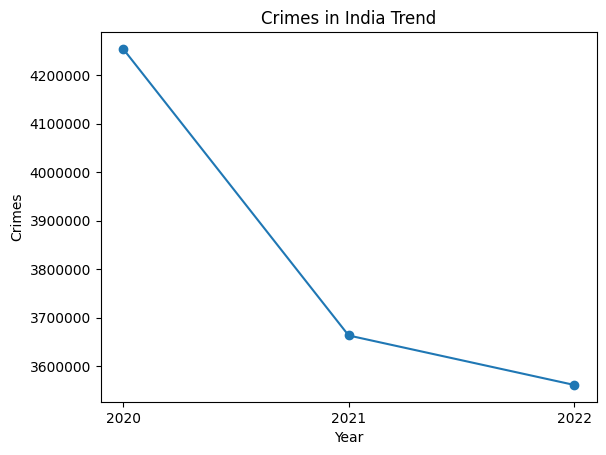

In [90]:
plt.plot(years,crimes,marker='o')
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.title("Crimes in India Trend")
plt.ticklabel_format(style='plain',axis='y')
plt.show()

In [100]:
years = np.array([2020,2021,2022])
crimes = np.array(crimes)

In [101]:
x = years.reshape(-1,1)
y = crimes

In [76]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [97]:
future_year = np.array([2023,2024,2025,2026])
future_year = future_year.reshape(-1,1)

In [98]:
prediction = model.predict(future_year)
prediction

array([3133388. , 2786899.5, 2440411. , 2093922.5])

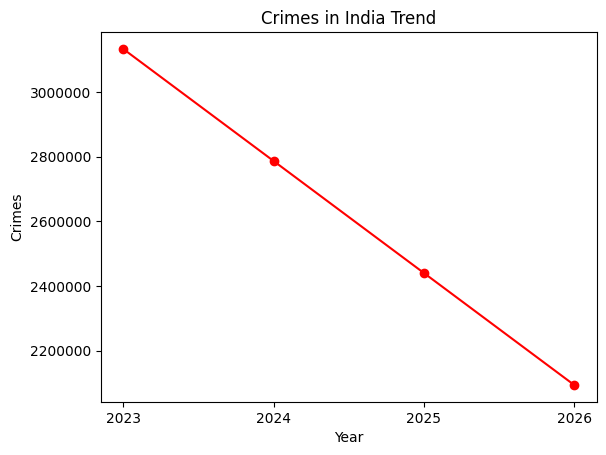

In [104]:
Year = ['2023','2024','2025','2026']
plt.plot(Year,prediction,marker='o',color='red')
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.title("Crimes in India Trend")
plt.ticklabel_format(style='plain',axis='y')
plt.show()

In [105]:
all_years = np.concatenate((years,future_year.flatten()))
all_years

array([2020, 2021, 2022, 2023, 2024, 2025, 2026])

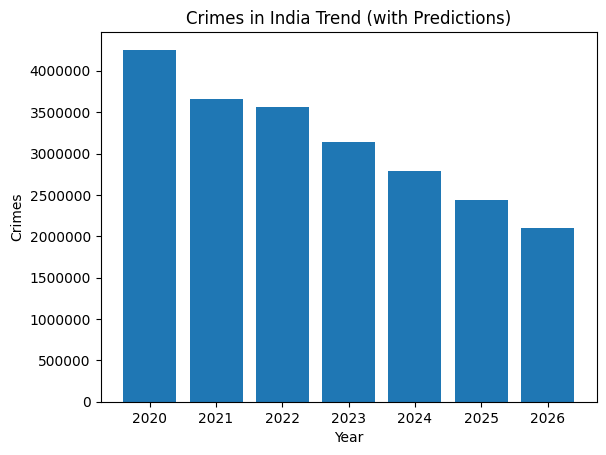

In [109]:
combined_crimes = np.concatenate((crimes, prediction))

plt.bar(all_years, combined_crimes)
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.title("Crimes in India Trend (with Predictions)")
plt.ticklabel_format(style='plain',axis='y')
plt.show()